* Netflix Analysis

Checking for the columns in Netflix

1. Popular Genres (listed_in) for Netflix

In [ ]:
genre_counts = df_netflix['listed_in'].value_counts()
#Counting shows by genre
print("Top 10 Genres by Number of Shows:") #Shows top 10 genres
print(genre_counts.head(10))

Top 10 Genres by Number of Shows:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


* Visualising the Popular Genres

In [ ]:
!pip install squarify #Downloading squarify

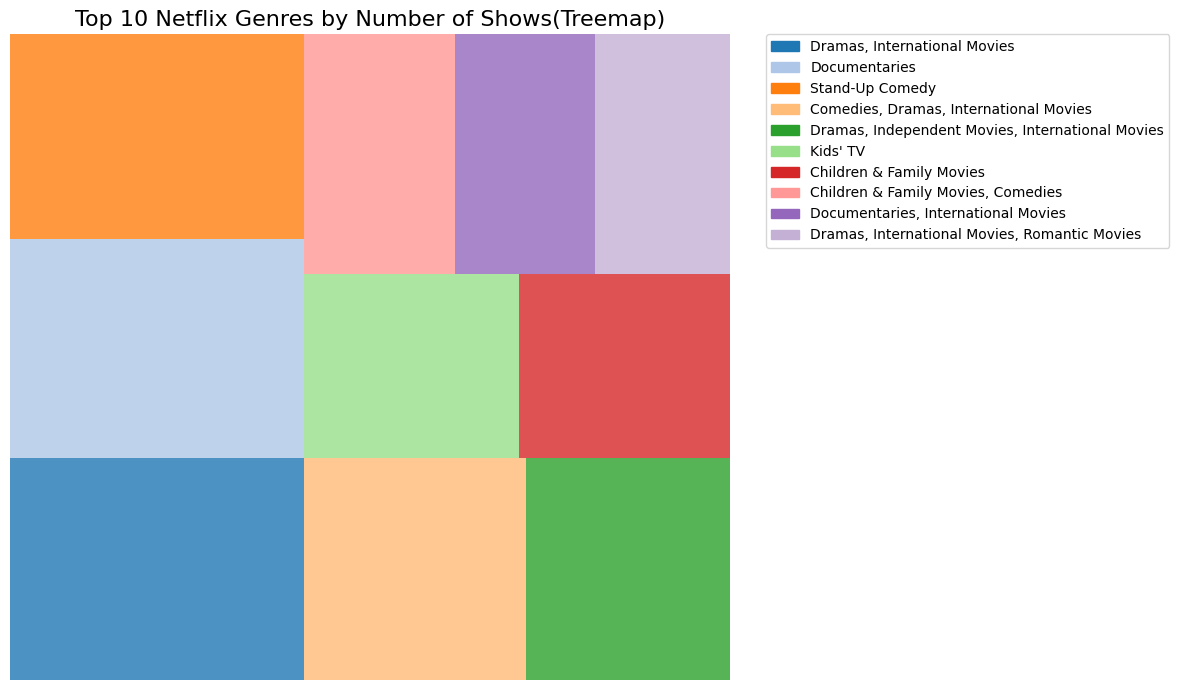

In [ ]:
import squarify #Importing squarify for treemap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch #Used to manually create legend patches

top_genres = df_netflix['listed_in'].value_counts().head(10)
plt.figure(figsize = (12,7)) #Making a new plot area that's 12 inches wide and 7 inches tall

colors = sns.color_palette('tab20', len(top_genres))

squarify.plot(sizes = top_genres.values, label = ['']*len(top_genres), alpha = 0.8, color = colors)
#Making a treemap where each rectangle's size matches the genre's count, labeling it with the genre's name, coloring each rectangle differently using a palatte and,
#Making them slightly transparent.

plt.title('Top 10 Netflix Genres by Number of Shows(Treemap)', fontsize=16)
#Title of the treemap
plt.axis('off')

# Creating custom legend with colors and genre names
legend_labels = top_genres.index.tolist()
legend_handles = [Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#Adds a separate legend box to the right of the chart

plt.tight_layout()
plt.show()


2. Releasing Years of Netflix Shows

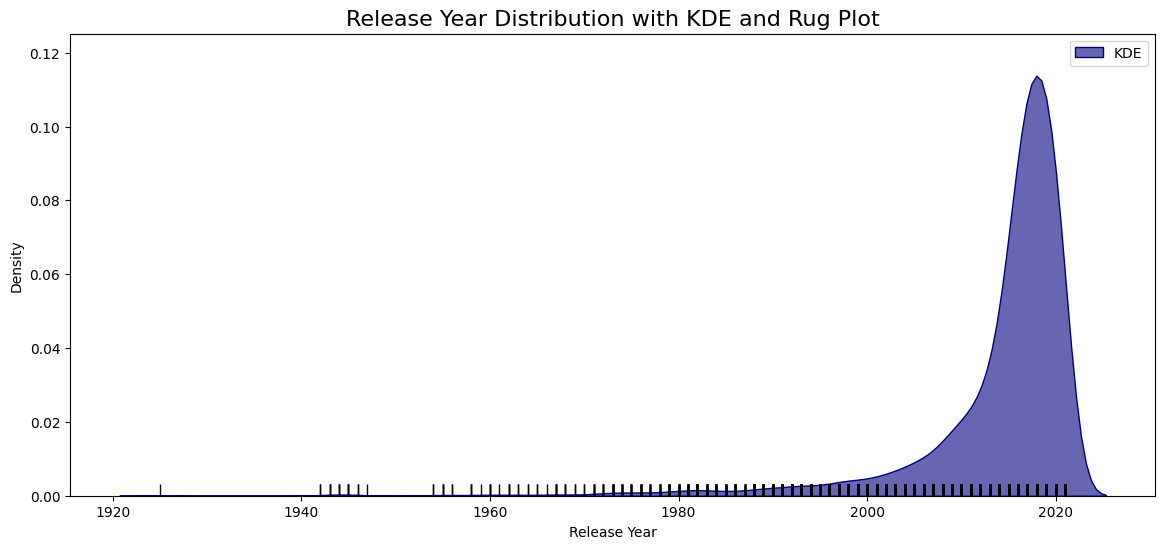

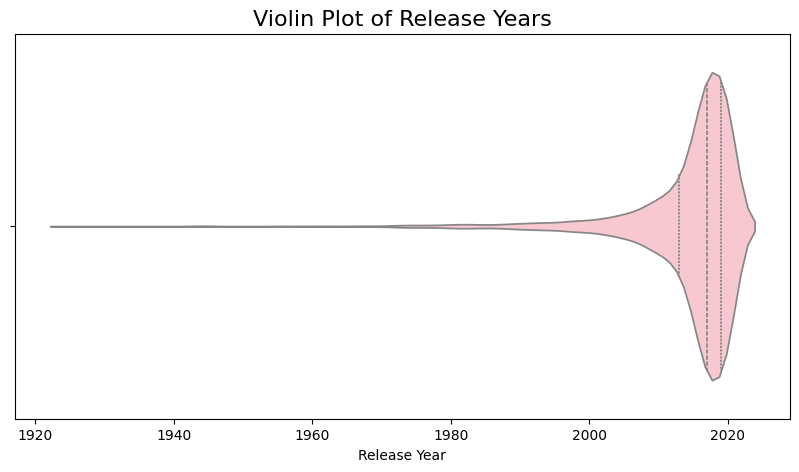

In [ ]:
plt.figure(figsize=(14,6))

#KDE(Kernel Density Estimate) plot
sns.kdeplot(df_netflix['release_year'], fill = True, color = 'navy', alpha = 0.6, label = 'KDE')

#Rug Plot(small ticks showing individual data points)
sns.rugplot(df_netflix['release_year'], color = 'black')

plt.title('Release Year Distribution with KDE and Rug Plot', fontsize = 16)
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.legend()
plt.show()

#Violin plot for distribution summary
plt.figure(figsize=(10,5))
sns.violinplot(x = df_netflix['release_year'], color = 'pink', inner = 'quartile')
plt.title('Violin Plot of Release Years', fontsize = 16)
plt.xlabel('Release Year')
plt.show()


3. Ratings Distribution

<ipython-input-37-5308757d2782>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df_netflix, x = 'rating', order = df_netflix['rating'].value_counts().index, palette = 'coolwarm')


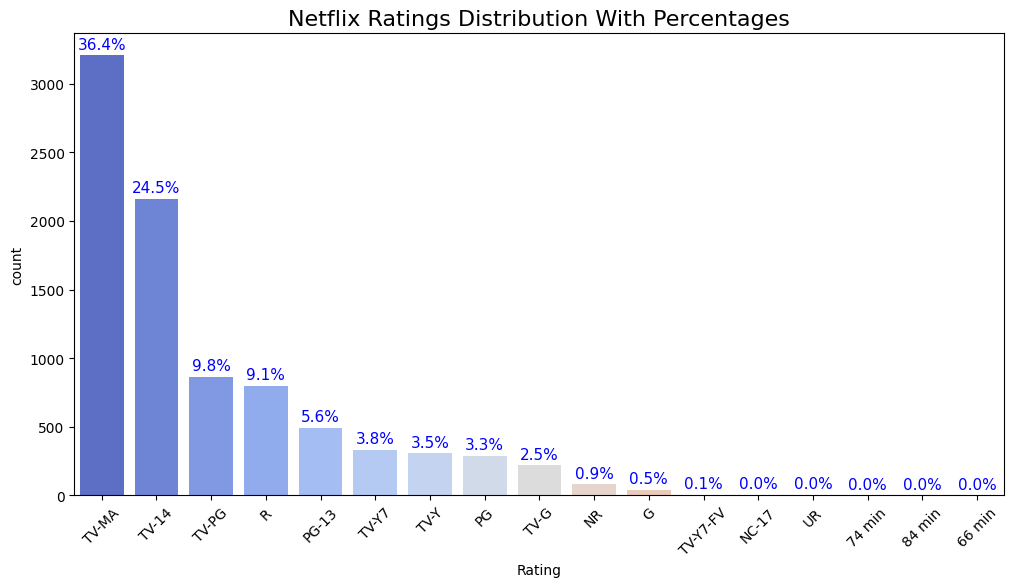

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Bar plot with percentages on top
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df_netflix, x = 'rating', order = df_netflix['rating'].value_counts().index, palette = 'coolwarm')

#Calculating the percentages
total = len(df_netflix)
for p in ax.patches: #Patches means listing all the graphical elememts and ax is axes
     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
     ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                 #Annotate means to add text label and to store the percentage
            ha='center', va='center', fontsize=11, color='blue', xytext=(0,8),
            textcoords='offset points')

#Adding a title and axis labels
plt.title('Netflix Ratings Distribution With Percentages', fontsize = 16)
plt.xlabel('Rating')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.show()

#Pie chart grouped in small categories
rating_counts = df_netflix['rating'].value_counts()
threshold = 1  # 1% threshold
total = rating_counts.sum()

# Separating large and small slices
large = rating_counts[rating_counts / total * 100 > threshold]
small = rating_counts[rating_counts / total * 100 <= threshold]

# Sum small slices into one "Other"
if not small.empty:
    large['Other'] = small.sum()

#Plotting pie with large + other
plt.figure(figsize=(14, 8))
wedges, texts, autotexts = plt.pie(
    large,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm', len(large)),
    pctdistance=1.0,
    labeldistance=1.2,
    wedgeprops={'edgecolor': 'white'},
    explode=[0.05] * len(large)
)

plt.legend(
    wedges, large.index, title="Ratings",
    loc="center left", bbox_to_anchor=(1, 0.5),#bbox is bounding box to anchor
    #bbox refers to the anchor points relative to the figure and loc species which point of the legend box.
    bbox_transform=plt.gcf().transFigure #plt.gcf() is get current figure
)
plt.title('Ratings Proportion Pie Chart (Grouped Small Categories)', fontsize=16, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()



In [ ]:
#Bar plot with percentages on top
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df_netflix, x = 'rating', order = df_netflix['rating'].value_counts().index, palette = 'coolwarm')

#Calculates the percentage each rating category contributes to the total
#Adds these percentages labels above each bar for better understanding
#Formula followed :- percentage = (count(count of items)/total(total no of items)*100)
total = len(df_netflix)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='blue', xytext=(0, 8),
                textcoords='offset points')


<ipython-input-36-529f385502aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df_netflix, x = 'rating', order = df_netflix['rating'].value_counts().index, palette = 'coolwarm')


4. Duration vs Rating Analysis

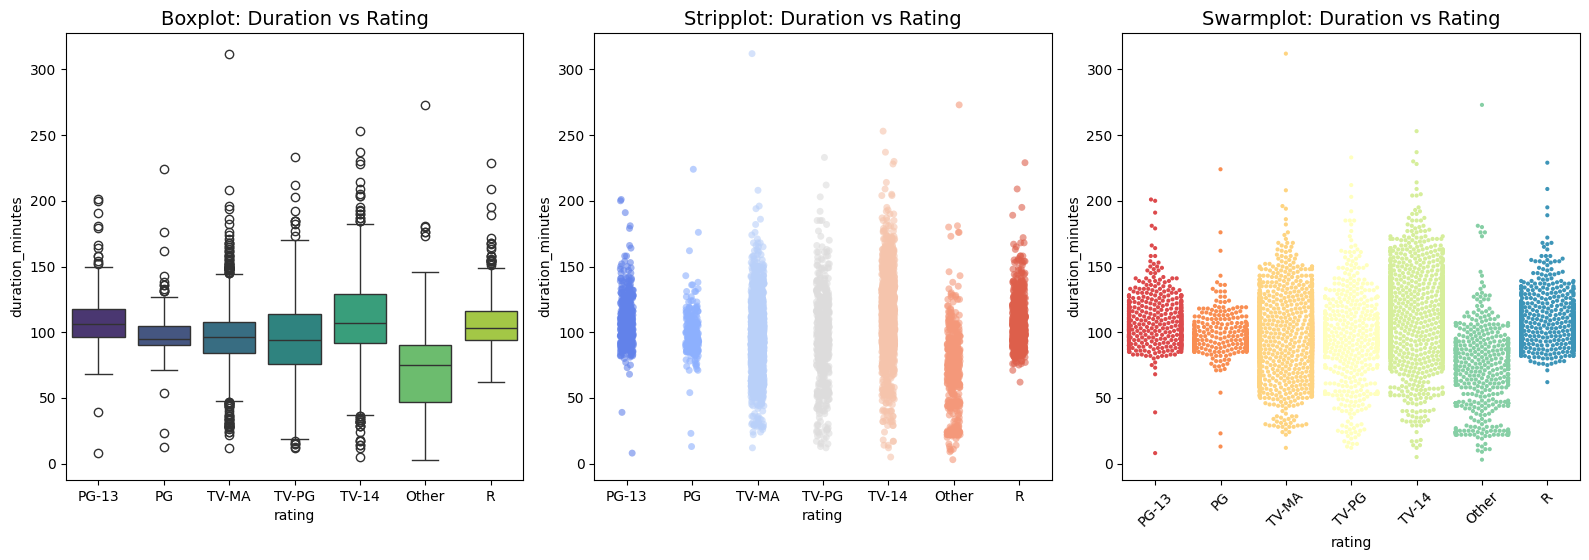

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
df_movies = df_netflix[df_netflix['type'] == 'Movie'].copy()
#Filtering to keep movies only

df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)
#Extracting numeric duration from 'duration' column

# Keeping top 6 ratings only, rest grouped into 'Other'
top_ratings = df_movies['rating'].value_counts().nlargest(6).index
df_movies['rating'] = df_movies['rating'].apply(lambda x: x if x in top_ratings else 'Other')

plt.figure(figsize=(16, 6))
#size of the figure

#Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data = df_movies, x = 'rating', y = 'duration_minutes', palette = 'viridis')
plt.title('Boxplot: Duration vs Rating', fontsize = 14)

#Stripplot
plt.subplot(1, 3, 2)
sns.stripplot(data = df_movies, x = 'rating', y = 'duration_minutes', palette = 'coolwarm', alpha = 0.6, jitter = True)
plt.title('Stripplot: Duration vs Rating', fontsize = 14)

#Swarmplot
plt.subplot(1, 3 ,3)
sns.swarmplot(data = df_movies, x = 'rating', y = 'duration_minutes', palette = 'Spectral', size = 3)
plt.title('Swarmplot: Duration vs Rating', fontsize = 14)

plt.xticks(rotation = 45)
plt.tight_layout(rect = [0, 0.05, 1, 1])  # extra bottom space for labels
plt.show()


* YouTube Analysis

1. Trend Analysis

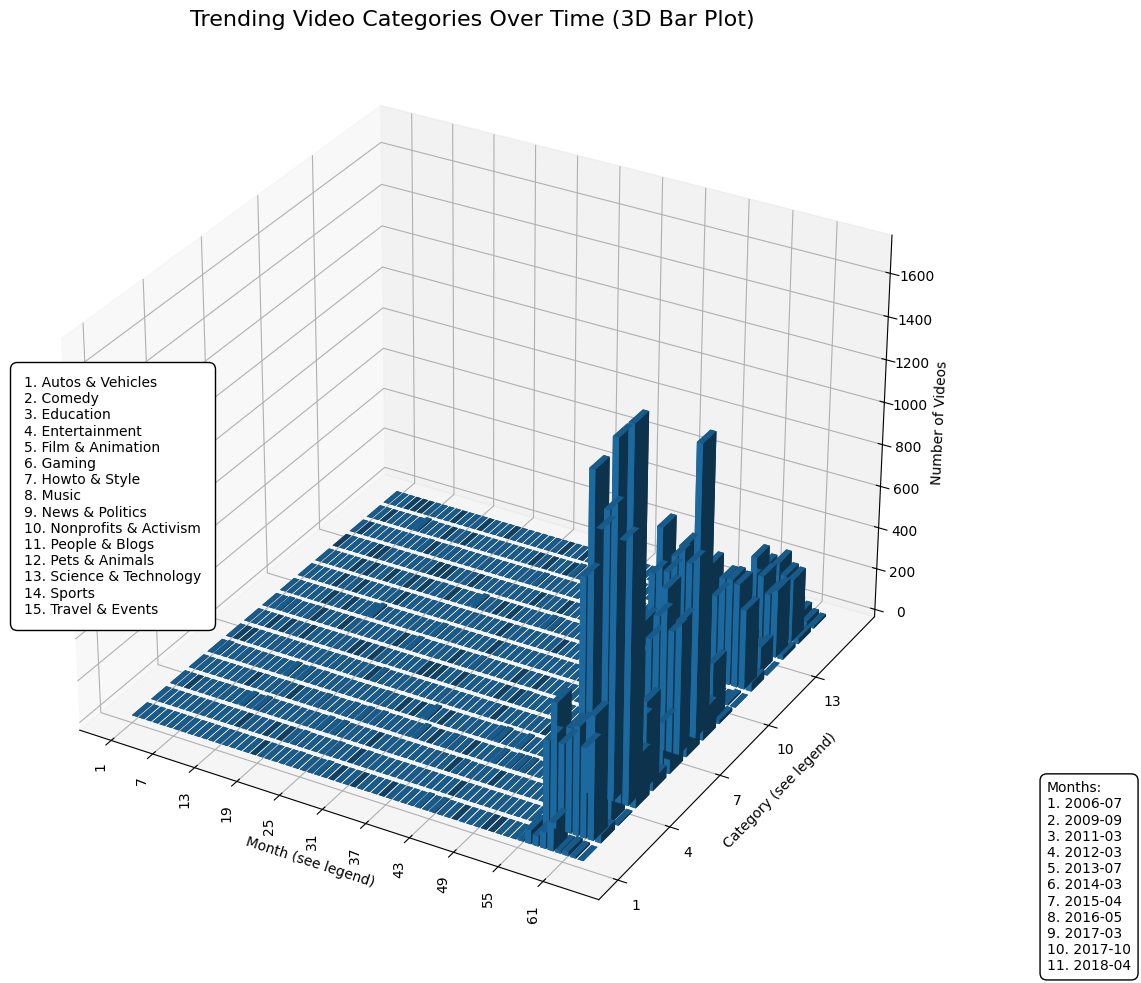

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.offsetbox import AnchoredText
#AnchoredText for dense graphs


# Converting publish_time to datetime
df_youtube['publish_time'] = pd.to_datetime(df_youtube['publish_time'])

# Creating year-month period column
df_youtube['year_month'] = df_youtube['publish_time'].dt.to_period('M')

# Category mapping dict(as per the dataset)
category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",

}

# Mapping category_id to category names
df_youtube['category'] = df_youtube['category_id'].map(category_mapping)

# Group by (grouping) category and year_month, count videos
grouped = df_youtube.groupby(['category', 'year_month']).size().reset_index(name='video_counts')

# Pivot table: rows=category, columns=year_month, values=video_counts
pivot_table = grouped.pivot(index='category', columns='year_month', values='video_counts').fillna(0)

categories = pivot_table.index.tolist()
months = pivot_table.columns.astype(str).tolist()
#It creates a list of strings representing all the months (year-months) from pivot table columns

cat_pos = np.arange(len(categories)) #y-axis
month_pos = np.arange(len(months)) #x-axis

# Create mesh grid for bars
x_pos, y_pos = np.meshgrid(month_pos, cat_pos)
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)

#dx and dy represents width and depth respectively
dx = dy = 0.8
dz = pivot_table.values.flatten()
#dz is a 2D NumPy of the data

# Plot setup
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

# 3D bar plot
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, shade=True)

# Setting numeric ticks to avoid overlapping
ax.set_xticks(month_pos[::6])  # Showing every 6th month tick
ax.set_xticklabels([str(i+1) for i in month_pos[::6]], rotation=90, fontsize=10)
ax.set_yticks(cat_pos[::3])  # Showing every 3rd category tick
ax.set_yticklabels([str(i+1) for i in cat_pos[::3]], fontsize=10)

ax.set_xlabel('Month (see legend)')
ax.set_ylabel('Category (see legend)')
ax.set_zlabel('Number of Videos')

plt.title('Trending Video Categories Over Time (3D Bar Plot)', fontsize=16)

# Adding category legend (index : name)
category_text = "\n".join([f"{i+1}. {cat}" for i, cat in enumerate(categories)])
anchored_cat = AnchoredText(category_text, loc='center left', prop=dict(size=10), frameon=True, pad=0.5)
anchored_cat.patch.set_boxstyle("round,pad=0.5,rounding_size=0.5")
ax.add_artist(anchored_cat)

# Adding month legend at bottom right outside plot
month_text = "\n".join([f"{i+1}. {m}" for i, m in enumerate(months[::6])])
# Placing as a text box below plot
plt.gcf().text(0.8, 0.1, "Months:\n" + month_text, fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


In [ ]:
#cat_pos refers to the position of the category in y-axis
#month_pos refers to the position of the month_pos in x-axis
cat_pos = np.arange(len(categories))
month_pos = np.arange(len(months))

#Using slicing on the month_pos array, so it selects every 6th element from month_pos
ax.set_xticks(month_pos[::6])
ax.set_xticklabels([str(i+1) for i in month_pos[::6]], rotation=90, fontsize=10)
#This is a list where we use for loop, i from the sliced array
#Adds 1 to it (i+1)
#Converts that number to a string(str(...)).
ax.set_yticks(cat_pos[::3])
ax.set_yticklabels([str(i+1) for i in cat_pos[::3]], fontsize=10)
#The same happens here just that it happens with y-axis

#This is a list comprehension that loops over all categories with their indexes i
#For each category it creates a string
#i+1 is used to start numbering from 1 to 0
category_text = "\n".join([f"{i+1}. {cat}" for i, cat in enumerate(categories)])
anchored_cat = AnchoredText(category_text, loc='center left', prop=dict(size=10), frameon=True, pad=0.5)
#Creates a floating box of text(AnchoredText),containing the category_text
anchored_cat.patch.set_boxstyle("round,pad=0.5,rounding_size=0.5")
#Styles the box with rounded corners and some padding for aesthetics.
ax.add_artist(anchored_cat)
#Adds this anchored text box as an artist (an element) to the plot.

2. Correlation And Relationships

### ***Variables are connected to each other***

Correlation Matrix:
                   views     likes  dislikes  comment_count
views          1.000000  0.849177  0.472213       0.617621
likes          0.849177  1.000000  0.447186       0.803057
dislikes       0.472213  0.447186  1.000000       0.700184
comment_count  0.617621  0.803057  0.700184       1.000000


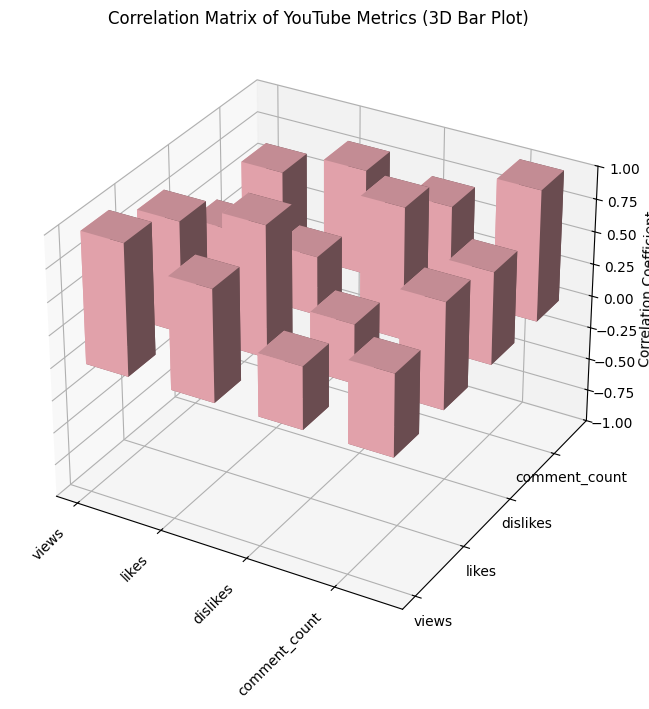

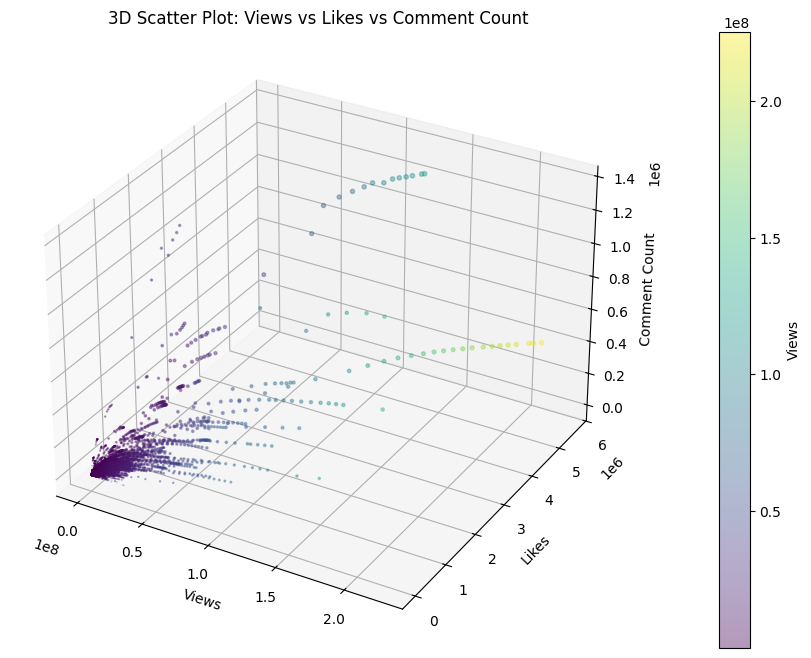

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Correlation Matrix :- measure the strength of relationships between numeric columns.
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']
correlation_matrix = df_youtube[numeric_cols].corr()

# Print the matrix for visibility
corr_matrix = df_youtube[numeric_cols].corr()
print('Correlation Matrix:\n', corr_matrix)

# 3D Bar Plot for Correlation Matrix
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#Define x and y axis labels based on the column names
x_labels = numeric_cols
y_labels = numeric_cols

#Positioning :- Creating index positions for x and y axes
x_pos = np.arange(len(x_labels))
y_pos = np.arange(len(y_labels))

#Create 2D grid positions for bars
x_pos, y_pos = np.meshgrid(x_pos, y_pos)
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)
dx = dy = 0.5
dz = corr_matrix.values.flatten() #All bars start from 0 on z-axis

#3D Bar plot with light pink bars to show correlation strength
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, shade=True, color='#FFB6C1')

#Set axis labels and ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_zlim(-1, 1) #Correlation values range betwwn -1 and 1
ax.set_zlabel('Correlation Coefficient')

plt.title('Correlation Matrix of YouTube Metrics (3D Bar Plot)')
plt.show()

# 3D Scatter Plot for Relationship Analysis between views, likes, and comments
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

#Extract values for plotting
views = df_youtube['views']
likes = df_youtube['likes']
comments = df_youtube['comment_count']

#Aesthetic Improvements
colors = plt.cm.viridis(views / views.max())   # Normalizing for coloring
sizes = 10 * (likes / likes.max())             # Size based on likes

#Scatter plot
scatter = ax.scatter(
    views, likes, comments,
    c = views,
    cmap = 'viridis',
    s=sizes,
    alpha=0.4
)

#Setting axis labels
ax.set_xlabel('Views')
ax.set_ylabel('Likes')
ax.set_zlabel('Comment Count')
plt.title('3D Scatter Plot: Views vs Likes vs Comment Count')

#Color bar to show color scale based on views
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Views')

plt.show()


3. Distribution Analysis

***Deepening the understanding of the datasets***

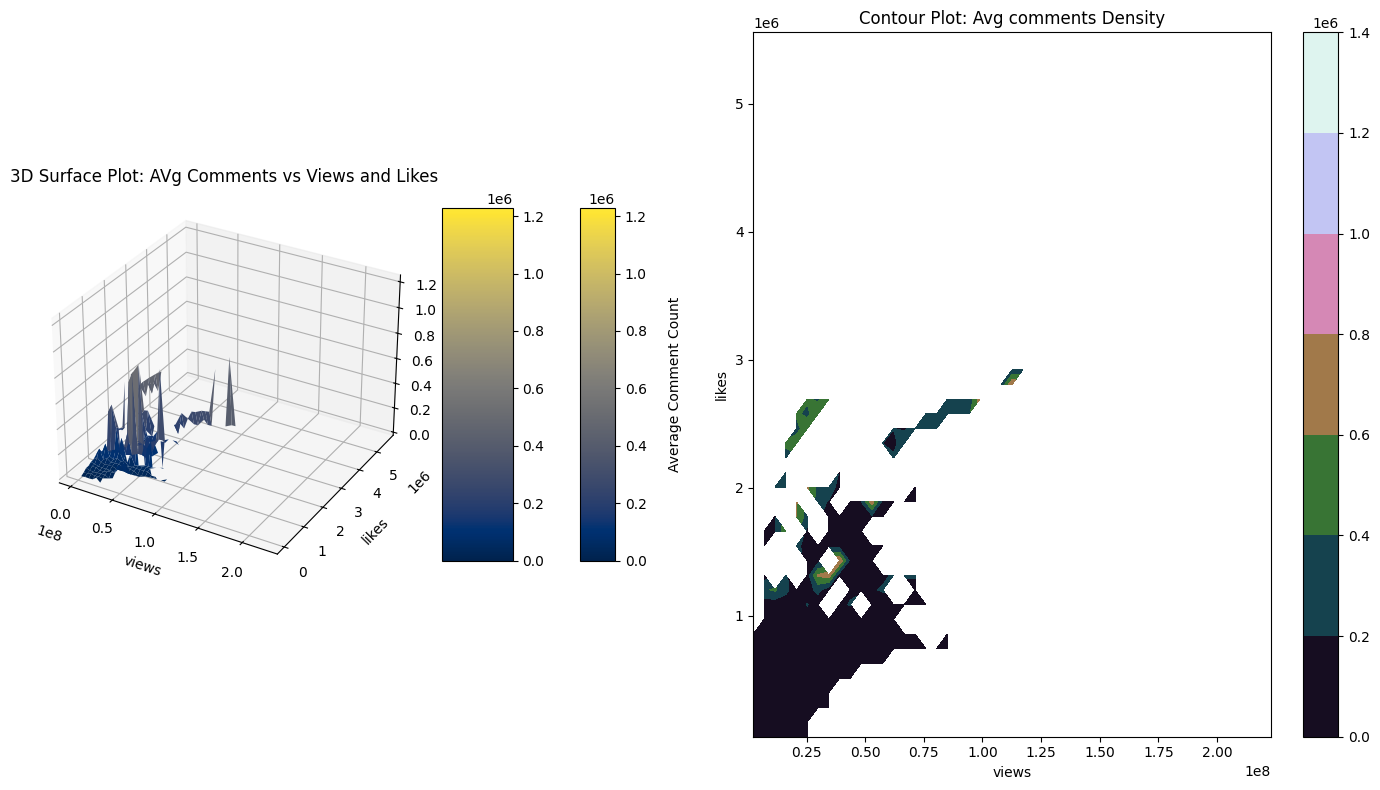

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
#Library prepares 2D data using statistics from 3D points

#Using two variables
x = df_youtube['views']
y = df_youtube['likes']

#Using a metric in each bin
z = df_youtube['comment_count']

#Defining the bins
x_bins = np.linspace(x.min(), x.max(), 50)
y_bins = np.linspace(y.min(), y.max(), 50)

#Computing binned statsitic (mean comment count per bin)
statistic, x_edge, y_edge, binnumber = binned_statistic_2d(x, y, z, statistic = 'mean', bins = [x_bins, y_bins])

#Computing binned statistic ( mean comment count per bin)
x, y = np.meshgrid((x_edge[:-1] + x_edge[1:])/2,(y_edge[:-1] + y_edge[1:]) / 2)

fig = plt.figure(figsize = (14,8))
fig.tight_layout(pad=3.0) #Slightly adjusting the subplot to prevent crowding

#3D Surface Plot
ax1 = fig.add_subplot(121, projection = '3d')
surf = ax1.plot_surface(X, Y, statistic.T, cmap='cividis', edgecolor='none')
ax1.set_xlabel('views')
ax1.set_ylabel('likes')
# Surface plot color bar with better placement
cbar1 = fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10, pad=0.1)
cbar1.set_label('Average Comment Count', labelpad=15)  # Added padding to move label away
ax1.set_title('3D Surface Plot: AVg Comments vs Views and Likes')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

#Contour Plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(x, y, statistic.T, cmap='cubehelix')
ax2.set_xlabel('views')
ax2.set_ylabel('likes')
ax2.set_title('Contour Plot: Avg comments Density')
fig.colorbar(contour, ax = ax2)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import binned_statistic_2d
x = df_youtube['views']
y = df_youtube['likes']
z = df_youtube['comment_count']
x_bins = np.linspace(x.min(), x.max(), 50)
y_bins = np.linspace(y.min(), y.max(), 50)
#It divides the 2D plane (x vs y) in grid-like bins,
#It then calculates the statistic values
statistic, x_edge, y_edge, binnumber = binned_statistic_2d(x, y, z, statistic = 'mean', bins = [x_bins, y_bins])
#Computes the average of each pair of edges
#Which gives the midpoint of the bins
#slicing the NumPy arrays x_edge and y_edge
x, y = np.meshgrid((x_edge[:-1] + x_edge[1:])/2,(y_edge[:-1] + y_edge[1:]) / 2)

4. Category-wise Analysis



> * Video Count Per Category



In [ ]:
print(df.columns)


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category'],
      dtype='object')


In [1]:
import plotly.express as px
import pandas as pd
import plotly.io as pio
pio.renderers.default = "colab"

# Data frame being created
data = pd.DataFrame({
    'category': ['A', 'B', 'C', 'A', 'B', 'C', 'A'],
    'video_count': [10, 20, 30, 5, 15, 25, 10]
})

# Creating the treemap
fig = px.treemap(data,
                 path = ['category'],
                 values = 'video_count',
                 color = 'video_count',
                 color_continuous_scale = 'Viridis',
                 title = 'Treemap of Video Count per Category')

fig.show()

fig.show(renderer = 'colab')

# Saving as HTML
fig.write_html("treemap_category_video_count.html")

# Downloading the HTML file (Colab only)
from google.colab import files
files.download("treemap_category_video_count.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * Average Views / Likes / Comments per Category

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"
# Firstly we create avg_metrics
avg_metrics = df_merged.groupby('category_title')[['views', 'likes', 'comment_count']].mean().reset_index()

# Spreading out points
avg_metrics['x'] = range(len(avg_metrics))
avg_metrics['y'] = np.random.rand(len(avg_metrics)) * 30
avg_metrics['z'] = np.random.rand(len(avg_metrics)) * 30

# Creating 3D bubble chart
fig = px.scatter_3d(
    avg_metrics,
    x ='x',
    y ='y',
    z ='z',
    color = 'category_title',
    size = 'views',
    hover_name = 'category_title',
    size_max = 40,
    title = '3D Bubble Chart - Avg Views per Category'
)

fig.update_layout(
    scene = dict(
        xaxis = dict(title='Category Index', showticklabels=False),
        yaxis = dict(title='Y Axis'),
        zaxis = dict(title='Z Axis')
    ),
    margin = dict(l = 0, r = 0, b = 0, t = 40)
)

fig.show()



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving USvideos.csv to USvideos.csv


In [ ]:
import pandas as pd

df_merged = pd.read_csv('USvideos.csv')

In [ ]:
#These lines are used to artificially generate x, y, z coordinates for plotting
avg_metrics['x'] = range(len(avg_metrics))
#It assigns a unique index to each row on the X-axis to spread them out clearly
avg_metrics['y'] = np.random.rand(len(avg_metrics)) * 30
#It gives random Y-axis positions to avoid bubb;e overlap and improve visibility
avg_metrics['z'] = np.random.rand(len(avg_metrics)) * 30
#Same logic but for Z-axis

* Median LIkes/Comments/Views

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio


pio.renderers.default = 'colab'


#median_stats DataFrame
median_stats = pd.DataFrame({
    'category':['Gaming', 'Music', 'Education', 'Comedy'],
    'likes' : [5000, 3000, 4500, 2000],
    'comments' : [800, 500, 700, 300],
    'views' : [100000, 750000, 90000, 60000]
})

#Manual min-max normalisation function
def min_max_normalize(series):
  return(series - series.min()) / (series.max() - series.min())

#Normalizing columns manually
median_stats['likes_norm'] = min_max_normalize(median_stats['likes'])
median_stats['comments_norm'] = min_max_normalize(median_stats['comments'])
median_stats['views_norm'] = min_max_normalize(median_stats['views'])

#Creating a list of column names
metrics = ['likes_norm', 'comments_norm', 'views_norm']

#Defining axes directions
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint = False)
axis_vectors = np.array([
    [np.cos(a), np.sin(a), 0] for a in angles
])

#Creates a new/empty plotly figurw
fig = go.Figure()


#For each category:
#Extracting normalised metric values(likes, comments, views)
#Scaling each axis vector by the corresponding value to get a 3D point
#Forms a triangle (polygon) in 3D space using these points
#Adding the first point at the end to close the loop
for idx, row in median_stats.iterrows():
  category = row['category']
  values = row[metrics].values
  points = axis_vectors.T * values
  points = points.T
  points = np.vstack([points, points[0]])

#Adding the actual 3D shape(polygon) for each category
  fig.add_trace(go.Scatter3d(
      x = points[:, 0],
      y = points[:, 1],
      z = points[:, 2],
      mode = 'lines+markers',
      name = category,
      marker = dict(size = 5),
      line = dict(width = 2)
))
#Draws the 3 main axes to visually represent each metrics
for i, vec in enumerate(axis_vectors):
  fig.add_trace(go.Scatter3d(
      x = [0, vec[0]],
      y = [0, vec[1]],
      z = [0, vec[2]],
      mode = 'lines',
      line = dict(color = 'black', dash = 'dash'),
      showlegend = False
  ))

#Labelling each axis
axis_labels = ['Likes','Comments','Views']
for i, vec in enumerate(axis_vectors):
  fig.add_trace(go.Scatter3d(
      x = [vec[0]*1.1],
      y = [vec[1]*1.1],
      z = [vec[2]*1.1],
      mode = 'text',
      text = [axis_labels[i]],
      showlegend = False
  ))
#Updating layout
fig.update_layout(
    title = '3D Radial Plot of Median Likes, Comments, Views per Category',
    scene = dict(
        xaxis = dict(title = 'x', range=[-1.2, 1.2]),
        yaxis = dict(title = 'y', range=[-1.2, 1.2]),
        zaxis = dict(title = 'z', range=[-1.2, 1.2]),
        aspectmode = 'cube'
    ),

    legend = dict(x = 0.8, y = 0.9)
)

fig.show()

In [ ]:
#Creating median_stats as a pandas dataframe
#Each has a category, likes, comments, views
median_stats = pd.DataFrame({
    'category':['Gaming', 'Music', 'Education', 'Comedy'],
    'likes' : [5000, 3000, 4500, 2000],
    'comments' : [800, 500, 700, 300],
    'views' : [100000, 750000, 90000, 60000]
})
#We are defining min max normalisation
#Normalising a numeric Pandas series to the range[0,1] using Min-Max scaling
#Formula: (value- min)/(max - min)
def min_max_normalize(series):
  return(series - series.min()) / (series.max() - series.min())
#For fair and balanced comparison we are using min max normalisation
median_stats['likes_norm'] = min_max_normalize(median_stats['likes'])
median_stats['comments_norm'] = min_max_normalize(median_stats['comments'])
median_stats['views_norm'] = min_max_normalize(median_stats['views'])

metrics = ['likes_norm', 'comments_norm', 'views_norm']

#Calculating equally spaced angles around a circle for each metric axis
#Creating a 3D unit vector in the XY plane pointing in those directions (z = 0)
#These vectors define the axes for the radial plot in 3D space
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint = False)
axis_vectors = np.array([
    [np.cos(a), np.sin(a), 0] for a in angles
])

* Engagement Rate Per Category

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'colab'

#Creating the median_stats DataFrame
median_stats = pd.DataFrame({
    'category': ['Gaming','Music', 'Education', 'Comedy'],
    'likes': [5000, 3000, 4500, 2000],
    'comments': [800, 500, 700, 300],
    'views': [100000, 750000, 90000, 60000]
})
#Calculating the engagement rate for each category
#It follows the formula engagememt rate = (likes+comments)/views
median_stats['engagement_rate'] = (median_stats['likes'] + median_stats['comments']) / median_stats['views']

#Converting the categories and engagement_rates column into a python list
categories = median_stats['category'].tolist()
engagement_rates = median_stats['engagement_rate'].tolist()

n = len(categories)
similarity = [[0]*n for _ in range(n)]
#It creates a 2D list of n rows and columns

#Calculating the max difference
max_diff = max(engagement_rates) - min(engagement_rates)

#This fills similarity matrix with values between 0 and 1, representing how similar two categories can be
for i in range(n):
  for j in range(n):
      diff = abs(engagement_rates[i] - engagement_rates[j])
      similarity[i][j] = 1 - (diff/max_diff)
      #Closer the engagement rate higher the similarity score

threshold = 0.5 #Cutoff value for similarity in a chord diagram
sources = [] #An empty list to store source node
targets = [] #An empty list to store target node
values = [] #An empty list to store strength or weight

#It builds three parallel lists which defines all categories and connections
for i in range(n):
   for j in range(n):
     if i != j and similarity[i][j] > threshold:
       sources.append(i)
       targets.append(j)
       values.append(similarity[i][j])

#Configuring how nodes of the sankey might look
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = 'black', width = 0.5),
        label = categories,
        color = '#AB63FA'
    ),

#This block defines the connections between nodes in Sankey diagram
      link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(255, 165, 0, 0.6)"
    )
)])

fig.update_layout(title_text = 'Circular Sankey Plot as Chord Diagram Substitute for Engagement Rate Similarity',
                  font_size = 10)
fig.show()

In [ ]:
#A Sankey is a type of diagram that shows the flow of quantities between different nodes or stages,
#Nodes represent entities
#Links connects the nodes
#The thickness of each link is proportional
#Performing matrix with values 0 and 1 and finding out the absolute difference
for i in range(n):
  for j in range(n):
      diff = abs(engagement_rates[i] - engagement_rates[j])
      similarity[i][j] = 1 - (diff/max_diff)
#Loop of i through each n category
#Loop of j through each i category
for i in range(n):
   for j in range(n):

    #Making sure we are not comparing a category with itself
     if i != j and similarity[i][j] > threshold:
      #Adds index i to the sources list
       sources.append(i)
       #Adds index j to the sources list
       targets.append(j)
       #Adds the similarity between i and j
       values.append(similarity[i][j])

* Trends Over Time Per Category

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving USvideos.csv to USvideos.csv


In [ ]:
import pandas as pd

df = pd.read_csv('USvideos.csv')

In [ ]:
print(df.columns)


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [ ]:
print(df.columns.tolist())

['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']


In [ ]:
category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism"
}


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'colab'


#Creating category mapping
category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism"
}

#Mapping category_id to actual category names
df['category'] = df['category_id'].map(category_mapping)

#Checking if succeeded
print("Unique categories after mapping:", df['category'].dropna().unique())

#Coverting trend_date column
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

#Grouping and Pivot
grouped = df.groupby(['trending_date', 'category'])['views'].mean().reset_index()

pivot = grouped.pivot(index='category', columns='trending_date', values='views').fillna(0)

#Preparing the plot
y_categories = pivot.index.tolist()
x_dates = pivot.columns.tolist()
z_values = pivot.values


Unique categories after mapping: ['People & Blogs' 'Entertainment' 'Comedy' 'Science & Technology'
 'Film & Animation' 'News & Politics' 'Sports' 'Music' 'Pets & Animals'
 'Education' 'Howto & Style' 'Autos & Vehicles' 'Travel & Events' 'Gaming'
 'Nonprofits & Activism']


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'colab'

#Converting trending_date to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

#Group by trending_date, category and views
grouped = df.groupby(['trending_date', 'category'])['views'].mean().reset_index()

#Pivoting to get the table
pivot = grouped.pivot(index='category', columns='trending_date', values='views').fillna(0)

#Defining the plotly inputs
y_categories = pivot.index.tolist()          # Listing of categories
x_dates = pivot.columns.tolist()             # Listing of dates
z_values = pivot.values                      #2D array of shape (n_categories, n_dates)

#Starting the plot
fig = go.Figure()

for idx, cat in enumerate(y_categories):
    y = z_values[idx]

    #Ribbon thickness
    thickness = y * 0.1
    upper = y + thickness
    lower = y - thickness

    #Upper bound (transparent)
    fig.add_trace(go.Scatter(
        x=x_dates,
        y=upper,
        mode='lines',
        line=dict(width=0),
        showlegend=False,
        hoverinfo='skip'
    ))

    #Lower bound (filled to upper)
    fig.add_trace(go.Scatter(
        x=x_dates,
        y=lower,
        mode='lines',
        fill='tonexty',
        fillcolor='rgba(0,100,200,0.3)',  # You can customize color per category
        line=dict(width=0),
        name=f'Category {cat}'
    ))

# Layout
fig.update_layout(
    title="Ribbon-like Area Plot of Views Over Time by Category",
    xaxis_title="Trending Date",
    yaxis_title="Average Views",
    hovermode='x unified'
)

fig.show()


* Category Share of Total Engagement

In [ ]:
import pandas as pd

youtube_data = pd.read_csv('USvideos.csv')


In [ ]:
print(youtube_data.columns)


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio

pio.renderers.default = 'colab'

# Mapping category_id to category_title
category_map = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}

youtube_data['category_title'] = youtube_data['category_id'].map(category_map)

# Aggregate total likes
engagement_data = youtube_data.groupby('category_title')['likes'].sum().reset_index()
engagement_data.rename(columns={'likes': 'engagement'}, inplace=True)

# Extracting categories and engagement lists
categories = engagement_data['category_title'].tolist()
engagement_values = engagement_data['engagement'].tolist()

# Limiting nodes to top 8 categories by engagement for clarity
top_n = 8
top_indices = np.argsort(engagement_values)[-top_n:]
categories = [categories[i] for i in top_indices]
engagement_values = [engagement_values[i] for i in top_indices]

# Creating the graph
G = nx.Graph()

for i, cat in enumerate(categories):
    G.add_node(cat, engagement=engagement_values[i])

# Threshold for edges
threshold = 1e7

for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        diff = abs(engagement_values[i] - engagement_values[j])
        if diff < threshold:
            weight = 1 / (diff + 1)
            G.add_edge(categories[i], categories[j], weight=weight)

# Using Kamada-Kawai layout for better spacing (3D)
pos = nx.kamada_kawai_layout(G, dim=3)

node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]
node_z = [pos[node][2] for node in G.nodes()]

# Scaling node sizes between min and max sizes
min_size = 5
max_size = 20
eng_min = min(engagement_values)
eng_max = max(engagement_values)
node_sizes = [min_size + (max_size - min_size) * (val - eng_min) / (eng_max - eng_min) for val in engagement_values]

# Preparing hover text (no permanent labels)
hover_texts = [f"{cat}<br>Engagement: {val:,}" for cat, val in zip(categories, engagement_values)]

# Node traces (markers only, with hover info)
node_trace = go.Scatter3d(
    x=node_x,
    y=node_y,
    z=node_z,
    mode='markers',
    text=hover_texts,
    hoverinfo='text',
    marker=dict(
        size=node_sizes,
        color=engagement_values,
        colorscale='Viridis',
        colorbar=dict(title='Engagement'),
        line=dict(width=1, color='DarkSlateGrey')
    )
)

# Edge traces
edge_x, edge_y, edge_z = [], [], []
for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='gray', width=1),
    hoverinfo='none'
)

# Plotting the figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title='3D Network Graph of Top YouTube Categories by Engagement',
    annotations=[dict(
        text="Rotate and zoom for better view. Hover on nodes for details.",
        showarrow=False,
        xref="paper", yref="paper",
        x=0, y=0,
        xanchor='left', yanchor='bottom',
        font=dict(size=12, color='gray')
    )],
    showlegend=False,
    margin=dict(l=0, r=0, b=0, t=60),
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False),
    )
)

fig.show()


In [ ]:
#Kamada kawai is used whenever a network graph is clustered together
#Threshold shall be 1e7 if the clustering is too much
#If the data points are large in numbers the nodes shall be limited

* Category Popularity Over Time

In [3]:
from google.colab import files
uploaded = files.upload()


Saving US_category_id.json to US_category_id.json


In [5]:
from google.colab import files
uploaded = files.upload()

Saving USvideos.csv to USvideos.csv


In [9]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import json
import plotly.io as pio

pio.renderers.default = 'colab'

# Loading YouTube CSV and JSON mapping
youtube_data = pd.read_csv('USvideos.csv')

with open('US_category_id.json') as f:
    category_data = json.load(f)

# Creating a mapping from category_id to title
id_title_map = {}
for item in category_data['items']:
    id_title_map[int(item['id'])] = item['snippet']['title']

# Mapping category_id to category_title
youtube_data['category_title'] = youtube_data['category_id'].map(id_title_map)

# Defining df_merged with only the necessary columns
df_merged = youtube_data[['trending_date', 'likes', 'comment_count', 'views', 'category_title']].copy()

# Converting trending_date and create engagement
df_merged['trending_date'] = pd.to_datetime(df_merged['trending_date'], format='%y.%m.%d', errors='coerce')
df_merged['engagement'] = df_merged['likes'] + df_merged['comment_count']
metric = 'views'

# Grouping and Pivot
grouped = df_merged.groupby(['category_title', 'trending_date'])[metric].sum().reset_index()
pivot = grouped.pivot(index='category_title', columns='trending_date', values=metric).fillna(0)

# Axis setup
z_data = pivot.values
x_labels = pivot.columns.strftime('%b-%d')
y_labels = pivot.index.tolist()

# Category name cleaning and mapping
y_labels = [cat if len(cat) <= 10 else '\n'.join(cat.split()) for cat in pivot.index]
category_map = {
    'Autos & Vehicles': 'Autos',
    'Science & Technology': 'Sci-Tech',
    'Howto & Style': 'Howto',
    'People & Blogs': 'Blogs',
    'News & Politics': 'News',
    'Education': 'Edu',
    'Film & Animation': 'Film',
    'Sports': 'Sports',
}
y_labels = [category_map.get(cat, cat) for cat in pivot.index]

x_data = np.arange(len(x_labels))
y_data = np.arange(len(y_labels))

# Plotting the 3D Surface
fig = go.Figure(data=[go.Surface(
    z=z_data,
    x=x_data,
    y=y_data,
    colorscale=[
        [0.0, '#AEC6CF'],
        [0.2, '#FFB347'],
        [0.4, '#B39EB5'],
        [0.6, '#77DD77'],
        [0.8, '#FF6961'],
        [1.0, '#FFD700']
    ],
    hoverinfo='x+y+z'
)])
# Calculating tick steps for cleaner labels
x_tick_step = max(1, len(x_data) // 6)
y_tick_step = max(1, len(y_data) // 6)

# Figure Layout for xaxis
fig.update_layout(
    title = 'YouTube Category Popularity Over Time',
    scene = dict(
        xaxis= dict(
            title = 'Date',
            tickmode = 'array',
            tickvals = x_data[::x_tick_step],
            ticktext = x_labels[::x_tick_step],
            tickangle = 45,
            tickfont = dict(size = 8)
        ),
        #Figure layout for yaxis
        yaxis = dict(
            title = 'Category',
            tickfont = dict(size = 9),  # Slightly smaller font for clarity
            tickmode = 'array',
            tickvals = y_data[::y_tick_step],
            ticktext = [y_labels[i] for i in range(0, len(y_labels), y_tick_step)]
        ),
        zaxis = dict(title = metric.capitalize())
    ),
    scene_camera = dict(eye = dict(x = 1.7, y = 2.0, z = 0.7)),
    margin = dict(l = 0, r = 0, t = 40, b = 0),
)

fig.show()
# Saving the chart as HTML
fig.write_html("surface_chart.html")

# Downloading the HTML file (Colab only)
from google.colab import files
files.download("surface_chart.html")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>